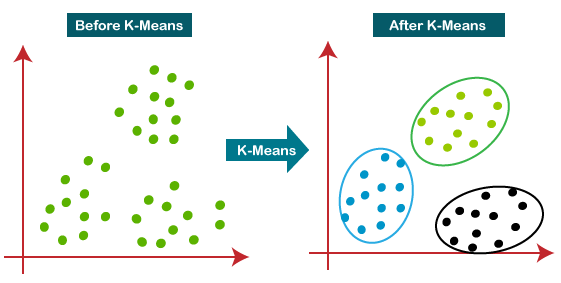

K-Means Algoritması:
<br><br>Algoritma istatistiksel olarak benzer nitelikteki kayıtları aynı gruba sokar. Bir elemanın yalnızca bir kümeye ait olmasına izin verilir.  Küme merkezi kümeyi temsil eden değerdir.

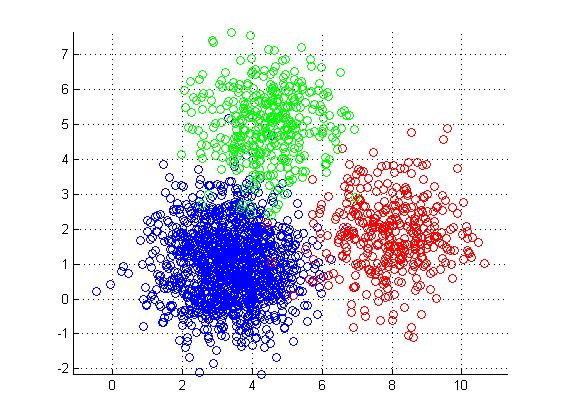

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x1 = np.random.normal(25,5,1000)
y1 = np.random.normal(25,5,1000)

x2 = np.random.normal(55,5,1000)
y2 = np.random.normal(60,5,1000)

x3 = np.random.normal(55,5,1000)
y3 = np.random.normal(15,5,1000)

x = np.concatenate((x1,x2,x3), axis = 0)
y = np.concatenate((y1,y2,y3), axis = 0)

dictionary = {"x":x, "y":y}

In [3]:
x

array([31.27204125, 34.05044209, 30.53264   , ..., 58.08445767,
       48.18310138, 54.11529962])

In [4]:
y

array([17.53599436, 22.72174364, 18.24315405, ..., 22.44679691,
       19.01337045, 16.78210591])

In [5]:
data = pd.DataFrame(dictionary)

In [6]:
data.describe()

,x,y
count,3000.000000,3000.000000
mean,44.909480,33.436441
std,14.975830,19.725858
min,7.375842,1.102173
25%,28.507839,17.560454
50%,51.467253,25.449628
75%,56.461371,56.808705
max,74.268689,77.876190


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       3000 non-null   float64
 1   y       3000 non-null   float64
dtypes: float64(2)
memory usage: 47.0 KB


In [8]:
data

,x,y
0,31.272041,17.535994
1,34.050442,22.721744
2,30.532640,18.243154
3,24.475104,27.431545
4,23.089203,20.434787
...,...,...
2995,57.069150,14.941925
2996,56.106590,12.982244
2997,58.084458,22.446797
2998,48.183101,19.013370


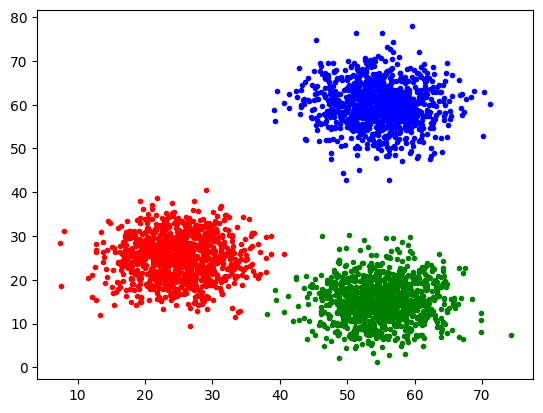

In [9]:
plt.scatter(x1,y1, marker=".", color='r')
plt.scatter(x2,y2, marker=".", color='b')
plt.scatter(x3,y3, marker=".", color='g')
plt.show()

C:\Users\burha\.conda\envs\green\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\burha\.conda\envs\green\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(
C:\Users\burha\.conda\envs\green\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\burha\.conda\envs\green\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can 

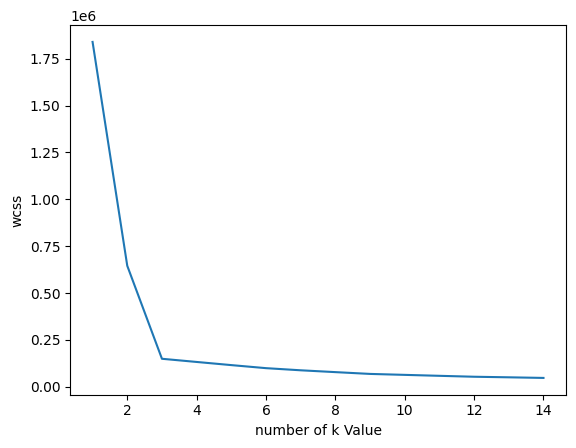

In [10]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,15),wcss)
plt.xlabel("number of k Value")
plt.ylabel("wcss")
plt.show()

In [11]:
wcss

[1839541.4902145488,
 645207.9084390816,
 149047.0602499369,
 132069.2851384734,
 115260.45640461802,
 98991.8123634516,
 87571.8246907556,
 77815.44507743257,
 68244.83361213408,
 63168.58825395156,
 58112.58660653369,
 53171.877434500275,
 50155.28367522148,
 46888.731648325396]

In [12]:
kmeans2 = KMeans(n_clusters=3)
clusters = kmeans2.fit_predict(data)

C:\Users\burha\.conda\envs\green\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\burha\.conda\envs\green\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


In [13]:
clusters

array([2, 2, 2, ..., 0, 0, 0])

In [14]:
data["label"] = clusters

In [15]:
data

,x,y,label
0,31.272041,17.535994,2
1,34.050442,22.721744,2
2,30.532640,18.243154,2
3,24.475104,27.431545,2
4,23.089203,20.434787,2
...,...,...,...
2995,57.069150,14.941925,0
2996,56.106590,12.982244,0
2997,58.084458,22.446797,0
2998,48.183101,19.013370,0


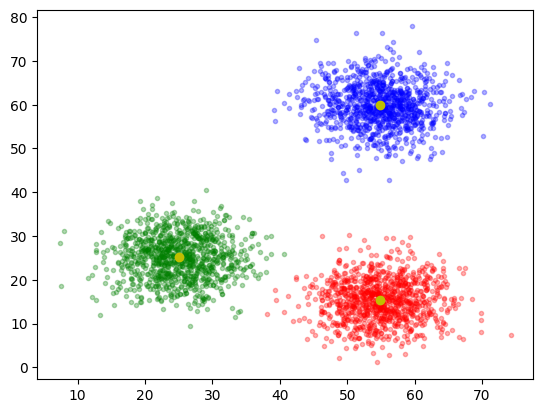

In [16]:
plt.scatter(data.x[data.label == 0],data.y[data.label == 0], color = 'r', marker='.', alpha=0.3)
plt.scatter(data.x[data.label == 1],data.y[data.label == 1], color = 'b', marker='.', alpha=0.3)
plt.scatter(data.x[data.label == 2],data.y[data.label == 2], color = 'g', marker='.', alpha=0.3)

plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1], color = 'y', marker='o')

plt.show()